# Solar Energy Power Generation Dataset


### About Dataset

Solar-based energy is becoming one of the most promising sources for producing power for residential, commercial, and industrial applications. Energy production based on solar photovoltaic (PV) systems has gained much attention from researchers and practitioners recently due to its desirable characteristics. However, the main difficulty in solar energy production is the volatility intermittent of photovoltaic system power generation, which is mainly due to weather conditions. For the large-scale solar farms, the power imbalance of the photovoltaic system may cause a significant loss in their economical profit. Accurate forecasting of the power output of PV systems in a short term is of great importance for daily/hourly efficient management of power grid production, delivery, and storage, as well as for decision-making on the energy market, facilitate early participation in energy auction markets and efficient resource planning.

https://www.kaggle.com/datasets/stucom/solar-energy-power-generation-dataset

In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False,world_readable=True)

df = pd.read_csv('../DataBases/Public Industrial Datasets/Solar energy power generation dataset/spg.csv')

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4213 entries, 0 to 4212
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   temperature_2_m_above_gnd          4213 non-null   float64
 1   relative_humidity_2_m_above_gnd    4213 non-null   int64  
 2   mean_sea_level_pressure_MSL        4213 non-null   float64
 3   total_precipitation_sfc            4213 non-null   float64
 4   snowfall_amount_sfc                4213 non-null   float64
 5   total_cloud_cover_sfc              4213 non-null   float64
 6   high_cloud_cover_high_cld_lay      4213 non-null   int64  
 7   medium_cloud_cover_mid_cld_lay     4213 non-null   int64  
 8   low_cloud_cover_low_cld_lay        4213 non-null   int64  
 9   shortwave_radiation_backwards_sfc  4213 non-null   float64
 10  wind_speed_10_m_above_gnd          4213 non-null   float64
 11  wind_direction_10_m_above_gnd      4213 non-null   float

In [80]:
df.describe()

,temperature_2_m_above_gnd,relative_humidity_2_m_above_gnd,mean_sea_level_pressure_MSL,total_precipitation_sfc,snowfall_amount_sfc,total_cloud_cover_sfc,high_cloud_cover_high_cld_lay,medium_cloud_cover_mid_cld_lay,low_cloud_cover_low_cld_lay,shortwave_radiation_backwards_sfc,...,wind_direction_10_m_above_gnd,wind_speed_80_m_above_gnd,wind_direction_80_m_above_gnd,wind_speed_900_mb,wind_direction_900_mb,wind_gust_10_m_above_gnd,angle_of_incidence,zenith,azimuth,generated_power_kw
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,...,4213.000000,4213.000000,4213.000000,4213.00000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,15.068111,51.361025,1019.337812,0.031759,0.002808,34.056990,14.458818,20.023499,21.373368,387.759036,...,195.078452,18.978483,191.166862,16.36319,192.447911,20.583489,50.837490,59.980947,169.167651,1134.347313
std,8.853677,23.525864,7.022867,0.170212,0.038015,42.843638,30.711707,36.387948,38.013885,278.459293,...,106.626782,11.999960,108.760021,9.88533,106.516195,12.648899,26.638965,19.857711,64.568385,937.957247
min,-5.350000,7.000000,997.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.540000,0.000000,1.120000,0.00000,1.120000,0.720000,3.755323,17.727761,54.379093,0.000595
25%,8.390000,32.000000,1014.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,142.400000,...,153.190000,10.140000,130.240000,9.18000,148.220000,11.160000,29.408181,45.291631,114.136600,231.700450
50%,14.750000,48.000000,1018.100000,0.000000,0.000000,8.700000,0.000000,0.000000,0.000000,381.810000,...,191.770000,16.240000,187.770000,14.49000,187.990000,18.000000,47.335557,62.142611,163.241650,971.642650
75%,21.290000,70.000000,1023.600000,0.000000,0.000000,100.000000,9.000000,10.000000,10.000000,599.860000,...,292.070000,26.140000,292.040000,21.97000,288.000000,27.000000,69.197492,74.346737,225.085620,2020.966700
max,34.900000,100.000000,1046.800000,3.200000,1.680000,100.000000,100.000000,100.000000,100.000000,952.300000,...,360.000000,66.880000,360.000000,61.11000,360.000000,84.960000,121.635920,128.415370,289.045180,3056.794100


In [81]:
# No null value, let's drop duplicates if they exist
df.drop_duplicates(inplace=True)
df.shape

(4213, 21)

In [82]:
# Ok, I am interested in generated_power_kw column, this will be our target column.
# Let's check correlations.
df.corr()['generated_power_kw'].sort_values(ascending=False).head(5) # positive related columns

generated_power_kw                   1.000000
shortwave_radiation_backwards_sfc    0.556148
temperature_2_m_above_gnd            0.217280
mean_sea_level_pressure_MSL          0.150551
snowfall_amount_sfc                 -0.049508
Name: generated_power_kw, dtype: float64

In [83]:
df.corr()['generated_power_kw'].sort_values(ascending=True).head(5) # negative related columns

zenith                            -0.649991
angle_of_incidence                -0.646537
relative_humidity_2_m_above_gnd   -0.336783
total_cloud_cover_sfc             -0.334338
low_cloud_cover_low_cld_lay       -0.288066
Name: generated_power_kw, dtype: float64

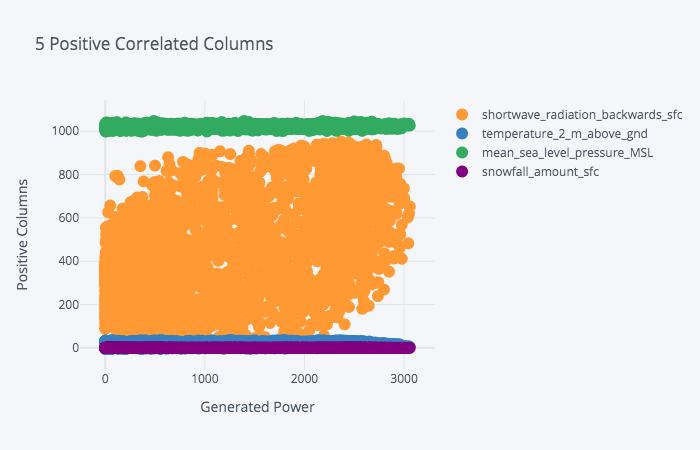

In [84]:
# hmm, that's interesting especially negative ones, let's visual the positive ones in one place.
ynames = [x for x in df.corr()['generated_power_kw'].sort_values(ascending=False).head(5).index if x != 'generated_power_kw']

fig = df.figure(kind='scatter',mode='markers',x='generated_power_kw', y=ynames,title='5 Positive Correlated Columns',
               xTitle='Generated Power',yTitle='Positive Columns')
fig.show("png")


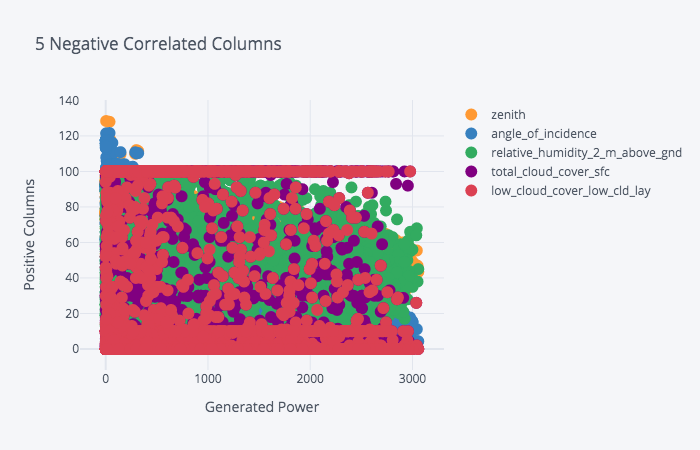

In [85]:
# Let's take a look at negative ones
ynnames = [x for x in df.corr()['generated_power_kw'].sort_values(ascending=True).head(5).index if x != 'generated_power_kw']
fig = df.figure(kind='scatter',mode='markers',x='generated_power_kw', y=ynnames,title='5 Negative Correlated Columns',
               xTitle='Generated Power',yTitle='Positive Columns')
fig.show("png")

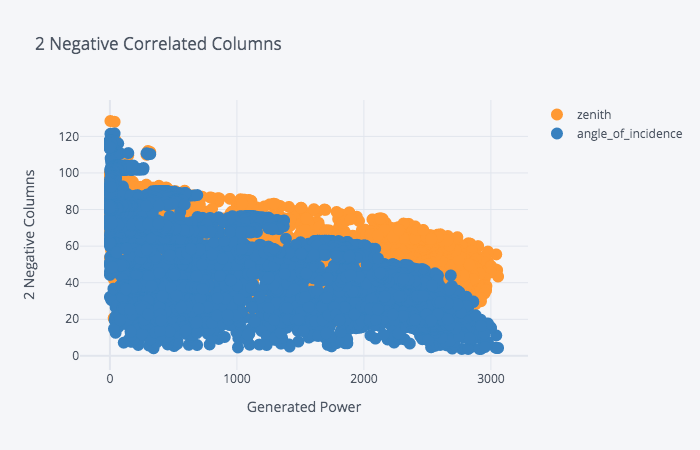

In [86]:
# it looks messy , we should look at zenith and angle_of_incidence first
fig = df.figure(kind='scatter',mode='markers',x='generated_power_kw', y=['zenith','angle_of_incidence'],title='2 Negative Correlated Columns',
               xTitle='Generated Power',yTitle='2 Negative Columns')
fig.show("png")

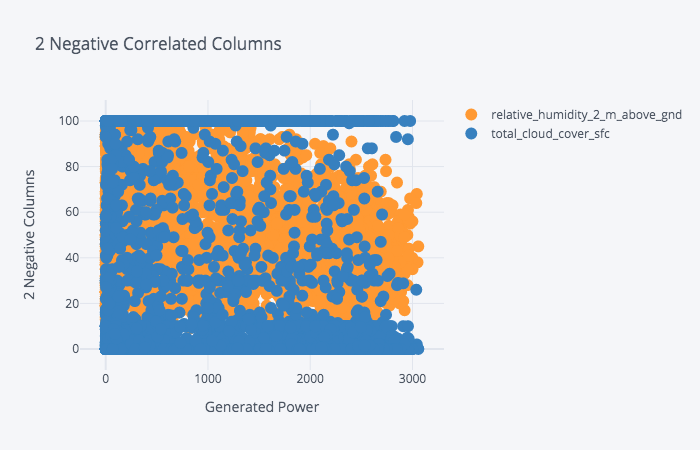

In [87]:
# Ok now humidity and clouds
fig = df.figure(kind='scatter',mode='markers',x='generated_power_kw', y=['relative_humidity_2_m_above_gnd','total_cloud_cover_sfc'],title='2 Negative Correlated Columns',
               xTitle='Generated Power',yTitle='2 Negative Columns')
fig.show("png")

In [88]:
# Ok so if we are going to build a solar energy farm, what conditions we should consider first when building a model;

# Radiation, zenith, angle_of_incidence, total_cloud_cover and relative humidity

# these are the most correlated ones but of course we can use more if we need to strengthen the model

In [89]:
from sklearn.linear_model import LinearRegression

y = df['generated_power_kw']
X = df[df.columns.drop('generated_power_kw')] # selecting all columns except target column
reg = LinearRegression().fit(X, y)
print(reg.score(X, y)) # oh that's low

0.7066325899313952


In [90]:
# lets check Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=20, random_state=2) # increasing the depth to 20 

regr.fit(X, y)
df['prediction'] = regr.predict(X)
print(regr.score(X,y)) # that's better

0.9731495544992866


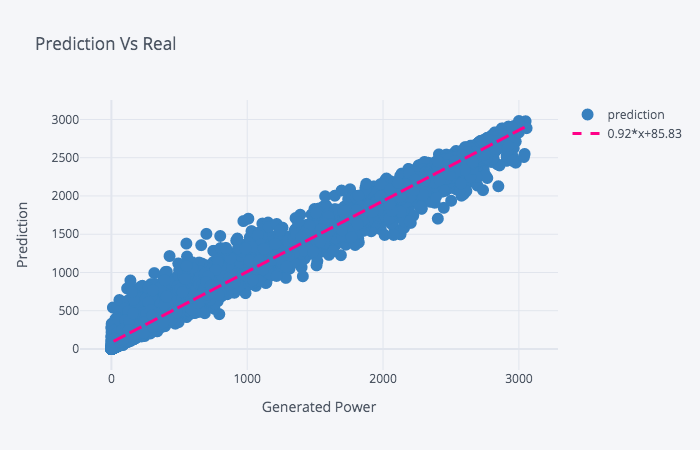

In [91]:
fig = df.figure(kind='scatter',mode='markers',x='generated_power_kw', y='prediction',title='Prediction Vs Real',
               xTitle='Generated Power',yTitle='Prediction',bestfit=True,colors=['blue'],bestfit_colors=['pink'])
fig.show("png")

In [92]:
print(df[['prediction','generated_power_kw']].head(20))

     prediction  generated_power_kw
0    448.715265          454.100950
1   1387.183672         1411.999400
2   2043.237087         2214.849300
3   2489.578854         2527.609200
4   2520.421477         2640.203400
5   2435.911041         2546.081600
6   1986.527229         2270.320700
7    824.527576         1063.830200
8     87.399048           86.817611
9     77.904674            9.666667
10   512.722246          513.908420
11  1178.713578         1076.719700
12  1457.700530         1018.714800
13  2399.779673         2307.085200
14  2399.286459         2261.335300
15  1656.020802         1706.410000
16  1296.929402         1385.810200
17   512.991264          547.775530
18    71.021520           61.566961
19   418.673156          419.208450


In [ ]:
# Not too bad.